| Parameter    | Units                 | Physical Role                                        |
|--------------|-----------------------|------------------------------------------------------|
| $$ \mu $$    | $$\text{Pa}\cdot\text{s}$$ | Dynamic viscosity of blood                           |
| $$ k_t $$    | $$ \text{m}^2 $$      | 3D tissue permeability                               |
| $$ k_v $$    | $$ \text{m}^2 $$      | Axial permeability along the vessel                  |
| $$ \gamma $$ | $$ \text{m}/(\text{Pa}\cdot\text{s}) $$ | Vessel wall permeability coefficient (coupling tissue & vessel) |
| $$ \gamma_R $$ | $$ \text{m}/(\text{Pa}\cdot\text{s}) $$ | Boundary outflow (Robin) permeability                 |
| $$ \gamma_a $$ | $$\text{m}$$                    | Terminal vessel coupling length scale (hydraulic conductance at end) |

In [1]:
%%capture
!pip install numpy==1.26.4
!pip install ipywidgets vtk meshio pyvista Rtree

In [10]:
import sys, os, importlib

WORK_PATH = "/root/3d-1d"
MODULES_PATH = os.path.join(WORK_PATH, 'modules')

sys.path.append(MODULES_PATH)

In [11]:
from graphnics import FenicsGraph

TEST_GRAPH_NODES = {
    0: [0.000, 0.020, 0.015],   # A
    1: [0.010, 0.020, 0.015],   # B
    2: [0.022, 0.013, 0.015],   # C
    3: [0.022, 0.028, 0.015],   # D
    4: [0.015, 0.005, 0.015],   # E
    5: [0.015, 0.035, 0.015],   # F
    6: [0.038, 0.005, 0.015],   # G
    7: [0.038, 0.035, 0.015]    # H
}

TEST_GRAPH_EDGES = [
    (0, 1, 0.004),  # AB
    (1, 2, 0.003),  # BC
    (1, 3, 0.003),  # BD
    (2, 4, 0.002),  # CE
    (2, 6, 0.003),  # CG
    (3, 5, 0.002),  # DF
    (3, 7, 0.003)   # DH
]

TEST_GRAPH = FenicsGraph()

for node, pos in TEST_GRAPH_NODES.items():
    TEST_GRAPH.add_node(node, pos=pos)

for u, v, radius in TEST_GRAPH_EDGES:
    TEST_GRAPH.add_edge(u, v, radius=radius)

In [12]:
import MeasureCreator
importlib.reload(MeasureCreator)

FACE_XZERO = MeasureCreator.XAxisPlane(0.0)
TEST_MESH = MeasureCreator.MeasureCreator(
    G = TEST_GRAPH,
    Lambda_inlet = [0],
    Omega_sink = FACE_XZERO,
    Omega_bounds_dim = [[0,0,0],[0.06, 0.06, 0.06]]
)

[[0, 0, 0], [0.06, 0.06, 0.06]]


In [13]:
import FEMSink
importlib.reload(FEMSink)

TEST = FEMSink.FEMSink(
    mc = TEST_MESH,
    gamma = 100,
    gamma_R = 1.0e-5,
    gamma_v = 1.0e-5,
    gamma_a = 1.0e-5,
    mu = 1.0e-3, # Viscosity
    k_t = 1.0e-10, # Tissue permeability in 3D
    k_v = 1.5e-11, # Vessel permeability in 1D
    P_in = 100.0 * 133.322, # 100 mmHg
    p_cvp = 1.0 * 133.322, # 1 mmHg
    Lambda_inlet = [0],
    Omega_sink = FACE_XZERO
)

Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2564.01it/s]


Applied BC! Non-empty list


In [14]:
import FEMSinkVelo
importlib.reload(FEMSinkVelo)

VTEST = FEMSinkVelo.FEMSinkVelo(
    mc = TEST_MESH,
    gamma = 100,
    gamma_R = 1.0e-5,
    gamma_v = 1.0e-5,
    gamma_a = 1.0e-5,
    mu = 1.0e-3, # Viscosity
    k_t = 1.0e-10, # Tissue permeability in 3D
    k_v = 1.5e-11, # Vessel permeability in 1D
    P_in = 100.0 * 133.322, # 100 mmHg
    p_cvp = 1.0 * 133.322, # 1 mmHg
    Lambda_inlet = [0],
    Omega_sink = FACE_XZERO
)

Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2617.34it/s]


Applied BC! Non-empty list


Node Pressure Data:
Node 0: Pressure 13332.2
Node 113: Pressure 13613.7
Node 57: Pressure 13423.5
Node 114: Pressure 12933.6
Node 29: Pressure 12414.6
Node 116: Pressure 11874.3
Node 58: Pressure 11322.3
Node 115: Pressure 10770.3
Node 15: Pressure 10217.6
Node 119: Pressure 9667.3
Node 60: Pressure 9146.7
Node 120: Pressure 8626.4
Node 30: Pressure 8114.4
Node 118: Pressure 7736.2
Node 59: Pressure 7500.4
Node 117: Pressure 7267.9
Node 8: Pressure 7022.2
Node 125: Pressure 6771.0
Node 63: Pressure 6517.7
Node 126: Pressure 6264.2
Node 32: Pressure 6010.4
Node 128: Pressure 5757.6
Node 64: Pressure 5512.4
Node 127: Pressure 5267.6
Node 16: Pressure 5027.2
Node 123: Pressure 4835.5
Node 62: Pressure 4700.8
Node 124: Pressure 4573.6
Node 31: Pressure 4443.2
Node 122: Pressure 4312.1
Node 61: Pressure 4180.4
Node 121: Pressure 4048.5
Node 1: Pressure 3916.7
Node 145: Pressure 3773.3
Node 73: Pressure 3647.4
Node 146: Pressure 3525.8
Node 37: Pressure 3405.4
Node 148: Pressure 3282.2
Node 

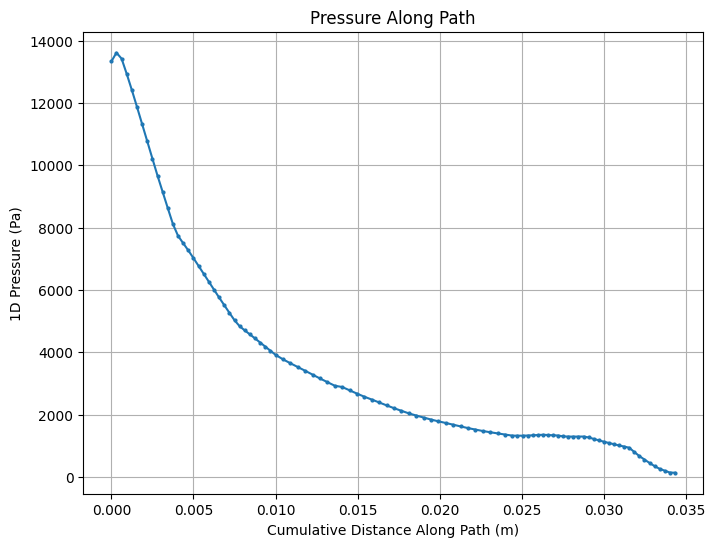

In [15]:
import Visualizer
importlib.reload(Visualizer)
Visualizer.plot_path_pressure(VTEST.uh1d, TEST_GRAPH, [0, 1, 3, 5])

In [29]:
import FEMSinkCubeFlux
import numpy as np
importlib.reload(FEMSinkCubeFlux)

TEST_GRAPH_CALIB = TEST_MESH.G_ref

CUBE_TEST = FEMSinkCubeFlux.FEMSinkCubeFlux(
    mc = TEST_MESH,
    gamma = 200,
    gamma_R = 8.0e-3,
    gamma_v = 2.0e-1,
    gamma_a = 450,
    mu = 1.0e-3, # Viscosity
    k_t = 1.0e-10, # Tissue permeability in 3D
    k_v = 7.6e-9, # Vessel permeability in 1D
    P_in = 100.0 * 133.322, # 100 mmHg
    p_cvp = 1.0 * 133.322, # 1 mmHg
    Lambda_inlet = [0],
    Omega_sink = FACE_XZERO,
    upper_cube_bounds = [np.array(TEST_GRAPH_CALIB.nodes[7]['pos']) - np.array([0.01, 0.01, 0.01]),
                         np.array(TEST_GRAPH_CALIB.nodes[7]['pos']) + np.array([0.01, 0.01, 0.01])],
    lower_cube_bounds = [[0,0,0],[0.02, 0.02, 0.02]]
)

Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2530.73it/s]


Applied BC! Non-empty list


Lower Cube Bounds: [[0, 0, 0], [0.02, 0.02, 0.02]]
Upper Cube Bounds: [array([0.03882667, 0.03478889, 0.02      ]), array([0.05882667, 0.05478889, 0.04      ])]


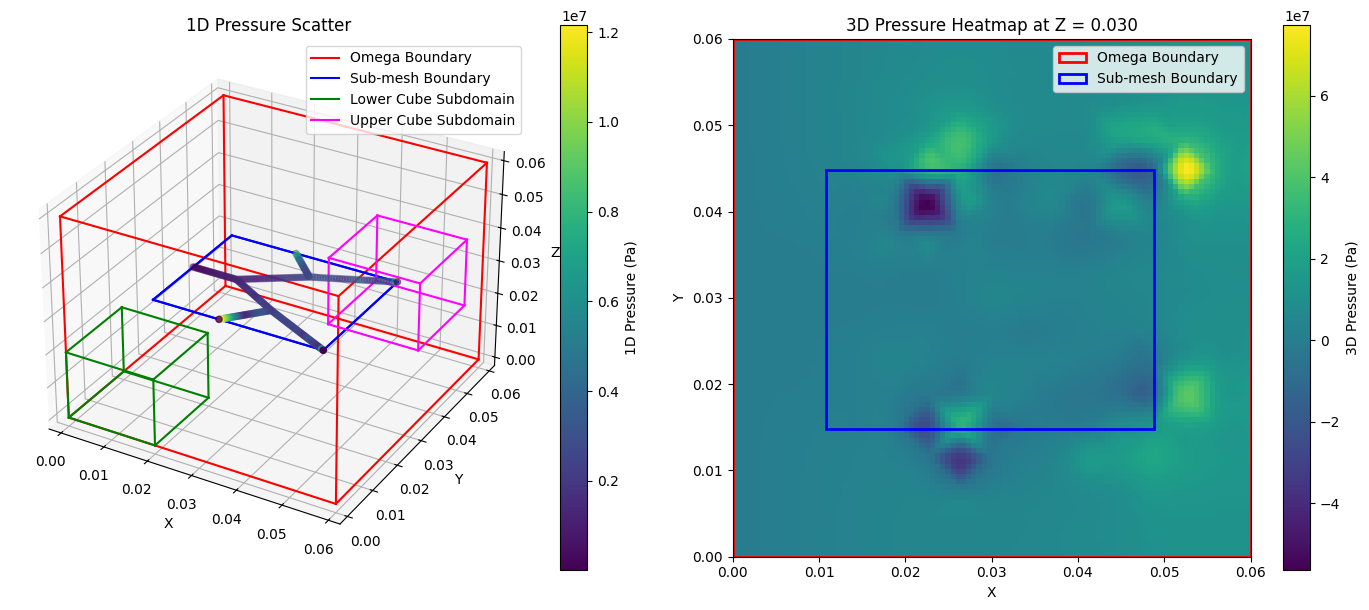

In [30]:
importlib.reload(Visualizer)
cube_lower_bounds = CUBE_TEST.lower_cube_bounds
cube_upper_bounds = CUBE_TEST.upper_cube_bounds

print("Lower Cube Bounds:", cube_lower_bounds)
print("Upper Cube Bounds:", cube_upper_bounds)

Visualizer.plot_with_boundaries(CUBE_TEST.uh1d, CUBE_TEST.uh3d,
     cube_lower=cube_lower_bounds, 
     cube_upper=cube_upper_bounds)

In [38]:
print(CUBE_TEST.compute_lower_cube_flux())
print(CUBE_TEST.compute_upper_cube_flux())

0.026597544071907432
0.031117969986939147


In [144]:
import datetime

now = datetime.datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")
filename = f"output_{timestamp}.vtk"

SAVE_PATH = os.path.join(WORK_PATH, "export", filename)
CUBE_TEST.save_vtk(SAVE_PATH)

Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2761.65it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1916.77it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1990.51it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1939.38it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1949.24it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2005.18it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2272.03it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2032.34it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1979.02it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1909.83it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1964.22it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1948.00it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1990.97it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1935.26it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1807.95it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1955.04it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1953.90it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1985.08it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1984.57it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1971.38it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 2013.33it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1742.59it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1857.70it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1908.74it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1823.15it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1798.90it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1827.28it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1707.52it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1610.86it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1881.58it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1880.07it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1615.55it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1572.30it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1689.82it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1616.75it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1631.00it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1959.21it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1716.52it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1589.56it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1594.96it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1711.01it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1603.08it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1535.48it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1586.22it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1561.76it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1570.15it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1618.22it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1555.85it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1553.40it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1573.37it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1597.59it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1563.32it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1596.72it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1584.89it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1652.11it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1603.44it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1667.45it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1587.85it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1615.91it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1595.00it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1541.54it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1585.95it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1534.18it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1624.05it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1592.34it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1625.20it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1533.50it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1622.34it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1597.68it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1596.53it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1562.88it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1572.23it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1559.82it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1588.23it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1544.70it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1672.34it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1551.26it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1551.60it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1555.26it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1627.23it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1610.74it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1638.23it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1584.19it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1589.45it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1609.14it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1585.27it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1574.96it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1598.80it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1671.43it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1571.60it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1664.90it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1851.21it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1570.90it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1519.79it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1504.73it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1596.86it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1659.37it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1489.09it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1541.18it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1543.56it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1581.05it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1602.55it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1750.44it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1486.28it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1579.56it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1602.00it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1544.27it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1558.77it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1605.45it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1711.61it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1536.69it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1487.24it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1659.88it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1600.36it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1566.57it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1559.69it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1521.95it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1677.02it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1601.98it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1563.28it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1528.97it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1543.25it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1580.38it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1591.00it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1587.65it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1577.09it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1399.96it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1519.42it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1533.29it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1542.15it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1484.64it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1613.95it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1676.88it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1522.89it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1590.86it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1615.22it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1516.32it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1575.08it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1486.54it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1600.06it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1565.54it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1672.84it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1546.71it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1434.79it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1586.27it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1556.57it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1525.76it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1468.32it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1572.36it/s]


Applied BC! Non-empty list


Averaging over 224 cells: 100%|██████████| 224/224 [00:00<00:00, 1441.87it/s]


Applied BC! Non-empty list


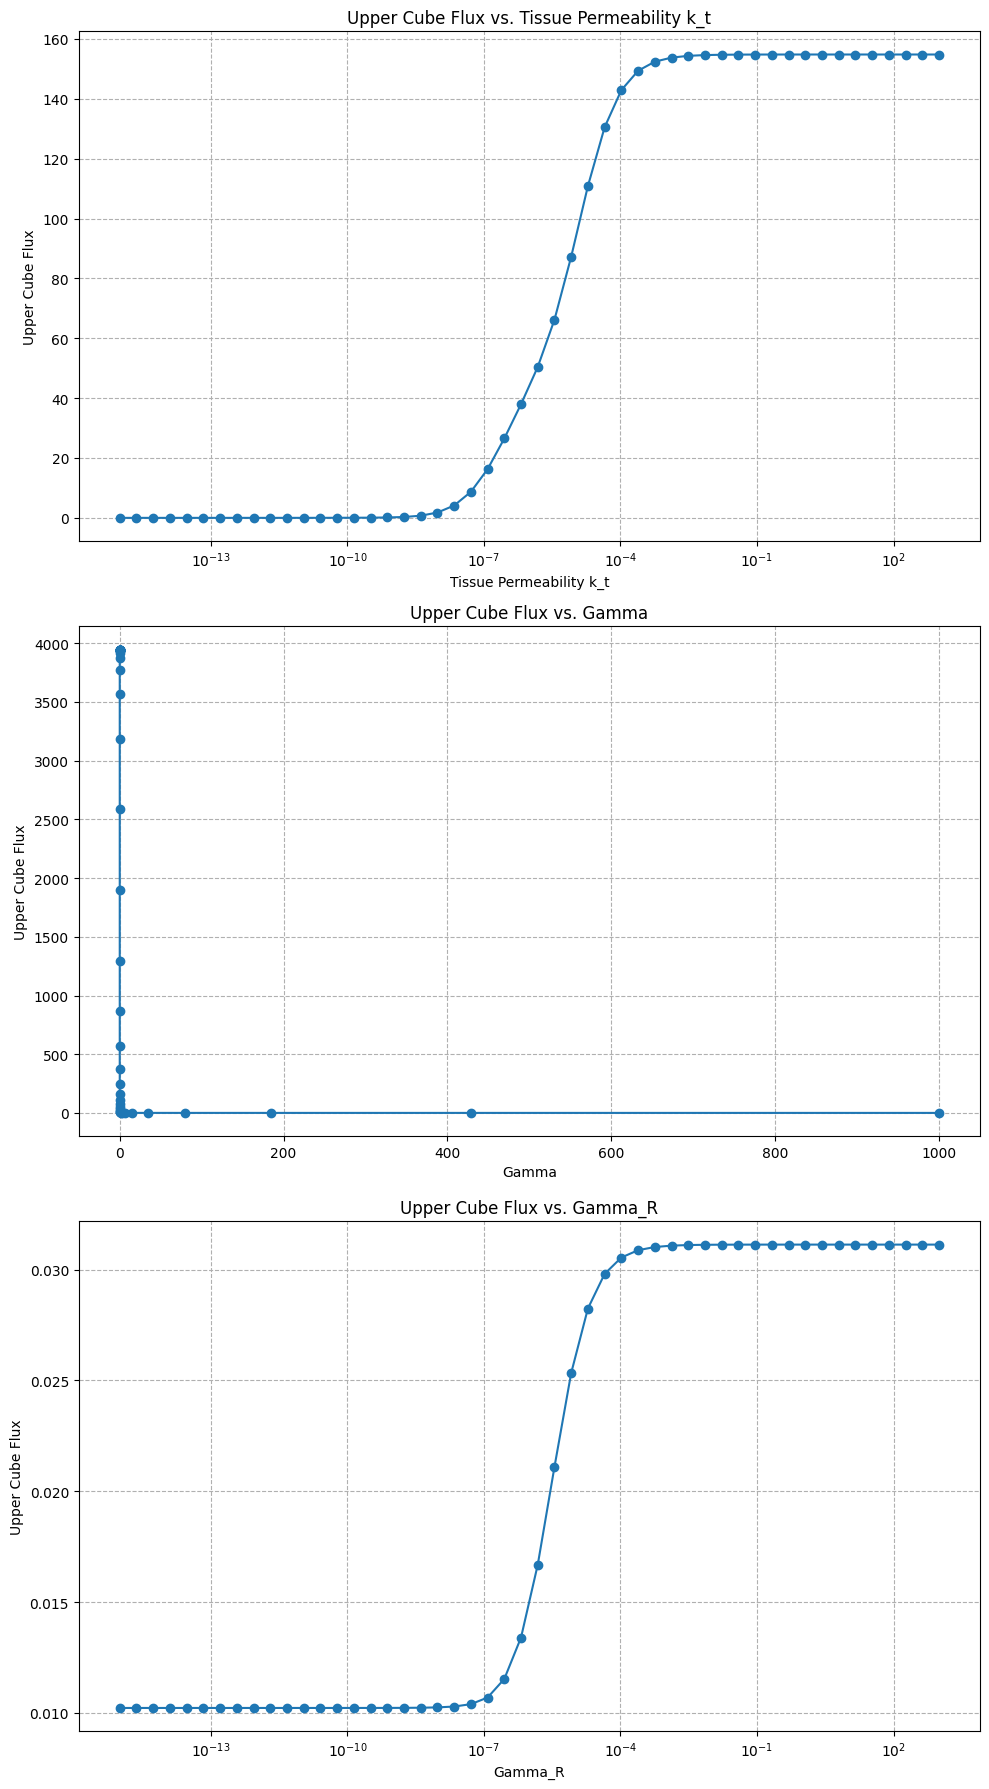

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import FEMSinkCubeFlux
import importlib
import time

importlib.reload(FEMSinkCubeFlux)

def run_sweep(param_name, values, defaults):
    fluxes = []
    for val in values:
        params = defaults.copy()
        params[param_name] = val
        cube_test = FEMSinkCubeFlux.FEMSinkCubeFlux(**params)
        flux = cube_test.compute_upper_cube_flux()
        fluxes.append(flux)
    return fluxes

def vary_parameters_and_plot(num_points=50):
    common_params = {
        'mc': TEST_MESH,
        'gamma': 200,             # Default value.
        'gamma_R': 8.0e-3,        # Default value.
        'gamma_v': 2.0e-1,
        'gamma_a': 450,
        'mu': 1.0e-3,
        'k_t': 1.0e-10,           # Default value.
        'k_v': 7.6e-9,
        'P_in': 100.0 * 133.322,   # 100 mmHg.
        'p_cvp': 1.0 * 133.322,    # 1 mmHg.
        'Lambda_inlet': [0],
        'Omega_sink': FACE_XZERO,
        'upper_cube_bounds': [
            np.array(TEST_GRAPH_CALIB.nodes[7]['pos']) - np.array([0.01, 0.01, 0.01]),
            np.array(TEST_GRAPH_CALIB.nodes[7]['pos']) + np.array([0.01, 0.01, 0.01])
        ],
        'lower_cube_bounds': [[0, 0, 0], [0.02, 0.02, 0.02]]
    }
    
    # Sweep 1: Varying k_t.
    kt_values = np.logspace(-15, 3, num_points)
    fluxes_kt = run_sweep('k_t', kt_values, common_params)
    
    # Sweep 2: Varying gamma.
    gamma_values = np.logspace(-15, 3, num_points)
    fluxes_gamma = run_sweep('gamma', gamma_values, common_params)
    
    # Sweep 3: Varying gamma_R.
    gamma_R_values = np.logspace(-15, 3, num_points)
    fluxes_gamma_R = run_sweep('gamma_R', gamma_R_values, common_params)
    
    fig, axes = plt.subplots(3, 1, figsize=(10, 18))
    
    axes[0].semilogx(kt_values, fluxes_kt, marker='o', linestyle='-')
    axes[0].set_xlabel("Tissue Permeability k_t")
    axes[0].set_ylabel("Upper Cube Flux")
    axes[0].set_title("Upper Cube Flux vs. Tissue Permeability k_t")
    axes[0].grid(True, which="both", ls="--")
    
    axes[1].plot(gamma_values, fluxes_gamma, marker='o', linestyle='-')
    axes[1].set_xlabel("Gamma")
    axes[1].set_ylabel("Upper Cube Flux")
    axes[1].set_title("Upper Cube Flux vs. Gamma")
    axes[1].grid(True, ls="--")
    
    axes[2].semilogx(gamma_R_values, fluxes_gamma_R, marker='o', linestyle='-')
    axes[2].set_xlabel("Gamma_R")
    axes[2].set_ylabel("Upper Cube Flux")
    axes[2].set_title("Upper Cube Flux vs. Gamma_R")
    axes[2].grid(True, which="both", ls="--")
    
    plt.tight_layout()
    plt.show()

vary_parameters_and_plot(num_points=50)